## US University Ranks

In [40]:
import pandas as pd
univ = pd.read_csv('univ.dat', skipfooter = 0)

#### 2a: How many universities are there in the data set?

In [41]:
univ.describe()

,Rank,Tuition and fees,Undergrad Enrollment
count,231.000000,231.000000,231.000000
mean,113.982684,33769.246753,14946.619048
std,65.995518,10756.733516,10569.664095
min,1.000000,5300.000000,1001.000000
25%,56.000000,25693.000000,6238.500000
50%,111.000000,31608.000000,12949.000000
75%,171.000000,42721.000000,22145.500000
max,220.000000,55056.000000,54513.000000


According to the summary of the univ.dat data set above, there are 231 universities in this data set (see: count 231 observations in all columns).

#### 2b: Estimate the maximum tuition of the university among the set of 25%  universities with the least tuition and fees?

<AxesSubplot:>

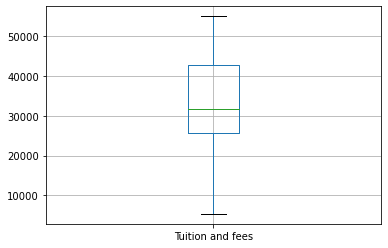

In [42]:
univ.boxplot(column = 'Tuition and fees')

According to the summary statistics, the maximum value for the lowest 25% of universities "Tuition and fees" is $25693. This statistics is reaffirmed by utilizing a boxplot of the "Tuition and fees" variable in the univ.dat data set, where the value appears to sit roughly between $20500 and $20600.

#### 2c: How many universities share the ranking of 220?

In [43]:
univ[univ.Rank == 220]

,Name,Location,Rank,Tuition and fees,Undergrad Enrollment
219,Benedictine University,"Lisle, IL",220.0,32170.0,3347.0
220,California State University--Fresno,"Fresno, CA",220.0,17209.0,21482.0
221,Gardner-Webb University,"Boiling Springs, NC",220.0,29850.0,2615.0
222,New Mexico State University,"Las Cruces, NM",220.0,21234.0,12526.0
223,Shenandoah University,"Winchester, VA",220.0,31322.0,2010.0
224,Tennessee Technological University,"Cookeville, TN",220.0,24800.0,9801.0
225,University of Massachusetts--Boston,"Boston, MA",220.0,32023.0,12949.0
226,University of Massachusetts--Dartmouth,"North Dartmouth, MA",220.0,19270.0,7295.0
227,University of Missouri--St. Louis,"St. Louis, MO",220.0,26277.0,13569.0
228,University of North Carolina--Greensboro,"Greensboro, NC",220.0,21595.0,15951.0


By isolating and locating all observations/rows that contain a value of 220 in the "Rank" column, I can now see that rows 219 - 230, or 12 universities all share the ranking of 220.

#### 2d: Can you find the mean fee for an undergrad student in the US from the summary statistics? Justify your answer.

With just the summary statistics, you cannot find the mean fee for an undergrad student in the US because the mean value provided above is just the mean tuition and fees for all universities in the US.

#### 3: Find the schools obtaining the maximum and minimum revenues by tuition fee. How much are the repective revenues?

In [44]:
univ['revenue'] = univ['Tuition and fees'] * univ['Undergrad Enrollment']

In [45]:
univ.iloc[univ['revenue'].argmax(),:]

Name                    Michigan State University
Location                         East Lansing, MI
Rank                                         82.0
Tuition and fees                          39090.0
Undergrad Enrollment                      39143.0
revenue                              1530099870.0
Name: 82, dtype: object

In [46]:
univ.iloc[univ['revenue'].argmin(),:]

Name                    SUNY College of Environmental Science and Fore...
Location                                                     Syracuse, NY
Rank                                                                 99.0
Tuition and fees                                                  17620.0
Undergrad Enrollment                                               1839.0
revenue                                                        32403180.0
Name: 100, dtype: object

By using the iloc and argmax() functions, I found that Michigan State University has the maximum tuition fee in the univ data set with $1530099870. Additionally, by using the iloc and argmin() functions, I found that SUNY College of Environmental Science and Forestry has the minimum tuition fee in the univ data set with $32403180.

#### 4: Find the average fee for an undergrad student in the US.

In [108]:
# Finding the mean of tuition_and_fees variable
univ['revenue'].sum()/univ['Undergrad Enrollment'].sum()

30845.32903298868

In [49]:
univ.describe()

,Rank,Tuition and fees,Undergrad Enrollment,revenue,tuition_and_fees
count,231.000000,231.000000,231.000000,2.310000e+02,231.000000
mean,113.982684,33769.246753,14946.619048,4.610334e+08,33769.246753
std,65.995518,10756.733516,10569.664095,3.150583e+08,10756.733516
min,1.000000,5300.000000,1001.000000,3.240318e+07,5300.000000
25%,56.000000,25693.000000,6238.500000,2.244614e+08,25693.000000
50%,111.000000,31608.000000,12949.000000,3.795070e+08,31608.000000
75%,171.000000,42721.000000,22145.500000,6.415063e+08,42721.000000
max,220.000000,55056.000000,54513.000000,1.530100e+09,55056.000000


The average fee for an undergrad student in the US is approximately $30845.33.

## FIFA World Cup Attendance

In [50]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [51]:
fifa = pd.read_html('https://en.wikipedia.org/wiki/FIFA_World_Cup', header = 1)

#### 1: Identify and read the data table containing the number of people attending world cups from 1930 to 2018. Attendance for how many world cups is there in the table? Assume each row contains information about a unique world cup.

In [52]:
len(fifa)

24

In [53]:
fifa = fifa[2] # Returns the second table in the data frame

In [54]:
fifa2 = fifa[:-1] # Removes the footer row because the row contains overall statistics about the columns and does not contain information about a unique world cup.

In [55]:
fifa2.Year.count()

21

There are 21 unique world cups included in the FIFA World Cup data set. I utilized the .count() function to count how many years were observed in this data set.

#### 2: Which year’s FIFA world cup witnessed the highest average number of spectators per match? Who was the host country then? Which countries competed in the game with the highest number of spectators in that world cup?

In [56]:
fifa2.iloc[fifa2['Avg.attendance'].argmax(),:]

Year                                          1994
Hosts                                United States
Venues/Cities                                  9/9
Totalattendance                            3587538
Matches                                         52
Avg.attendance                               68991
Number                                       94194
Venue              Rose Bowl, Pasadena, California
Game(s)             Brazil 0–0 (3–2p) Italy, Final
Name: 14, dtype: object

By utilizing the .iloc and .argmax functions, I found that the FIFA world cup with the highest average attendance per game was the 1994 World Cup hosted by the United States and held in Pasadena, California. Brazil and Italy competed in that game.

#### 3: Is the following statement true: 64 matches were played in at least 25% of the world cups. Justify your answer.

In [57]:
fifa2.describe()

,Totalattendance,Matches,Avg.attendance
count,2.100000e+01,21.000000,21.000000
mean,1.930118e+06,42.857143,42147.238095
std,1.077834e+06,17.467930,12191.364566
min,3.630000e+05,17.000000,20872.000000
25%,8.931720e+05,32.000000,32808.000000
50%,1.865753e+06,38.000000,46039.000000
75%,2.785100e+06,64.000000,49099.000000
max,3.587538e+06,64.000000,68991.000000


I would say that this statement is true. By examining the summary statistics of the FIFA World Cup data set, we can see that the value for the 75th percentile is 64 matches. Since the max number of matches for this particular data set is 64 matches as well, it is understood that the top 25% of world cups in this data set had 64 matches played.

#### 4: What is the median year of the world cups (or the median value of the ‘Year’ column)? Note that FIFA world cup has been played on every 4th year after the previous world cup, starting 1930 and until 2018. However, it was not played in 1942 and 1946, due to WWII. Assume the table contains data for all the world cups.

In [61]:
fifa2.median()

Year                  1978.0
Totalattendance    1865753.0
Matches                 38.0
Avg.attendance       46039.0
dtype: float64

By utilizing the df.median() function, I found that the median value of the 'Year' column was the 1978 FIFA world cup.

#### 5: What is the average number of people attending a match across all world cups?

In [77]:
fifa2['Totalattendance'].sum()/fifa2['Matches'].sum()

45036.08666666667

I found that the mean value of the number of people attending a match across all world cups is 45036 people.

## Movie Ratings

#### 1: How many movies are there in the dataset? Drop all columns except 'Title', 'US Gross', 'Worldwide Gross', ‘US DVD Sales’, 'Production Budget', and ’IMDB Rating'.

In [69]:
movies = pd.read_json('https://raw.githubusercontent.com/vega/vega-datasets/master/data/movies.json')

In [73]:
movies.Title.count()

3200

In [84]:
movies = movies.drop(columns = ['Release Date', 'MPAA Rating', 'Running Time min', 'Distributor', 'Source', 'Major Genre', 'Creative Type', 'Director', 'Rotten Tomatoes Rating', 'IMDB Votes'])

According to the df.Title.count() function, there are 3200 movies in this data set in total. Additionally, I dropped the indicated columns.

#### 2: What is the mean ROI? Which movie has the maximum ROI? Is it the one with minimum production budget?

In [85]:
movies['ROI'] = (movies['Worldwide Gross'] - movies['Production Budget'])/movies['Production Budget']

In [86]:
movies.mean()

US Gross             4.400209e+07
Worldwide Gross      8.534340e+07
US DVD Sales         3.490155e+07
Production Budget    3.106917e+07
IMDB Rating          6.283467e+00
ROI                  1.055750e+01
dtype: float64

In [87]:
movies.iloc[movies['ROI'].argmax(),:]

Title                Paranormal Activity
US Gross                     107918810.0
Worldwide Gross              193770453.0
US DVD Sales                  14051496.0
Production Budget                15000.0
IMDB Rating                          6.7
ROI                           12917.0302
Name: 2526, dtype: object

In [88]:
movies.iloc[movies['Production Budget'].argmin(),:]

Title                 Tarnation
US Gross               592014.0
Worldwide Gross       1162014.0
US DVD Sales                NaN
Production Budget         218.0
IMDB Rating                 7.1
ROI                  5329.33945
Name: 2920, dtype: object

The mean ROI is 10.56 for this data set, and the movie that has the maximum ROI is "Paranormal Activity" with an ROI of 12917.0302. Alternatively, the movie with the lowest production budget is "Tarnation" with a production budget of $218.

#### 3: What is the ROI of the movie with the maximum IMDB rating? Is it in the top 25% movies in terms of ROI? Is it in the bottom 25% movies in terms of production budget?

In [99]:
movies.iloc[movies['IMDB Rating'].argmax(),:]

Title                The Godfather
US Gross               134966411.0
Worldwide Gross        268500000.0
US DVD Sales                   NaN
Production Budget        7000000.0
IMDB Rating                    9.2
ROI                      37.357143
gross_difference       133533589.0
Name: 369, dtype: object

In [100]:
movies.describe()

,US Gross,Worldwide Gross,US DVD Sales,Production Budget,IMDB Rating,ROI,gross_difference
count,3.194000e+03,3.194000e+03,5.640000e+02,3.200000e+03,2988.000000,3193.000000,3.194000e+03
mean,4.400209e+07,8.534340e+07,3.490155e+07,3.106917e+07,6.283467,10.557496,4.134131e+07
std,6.255531e+07,1.499473e+08,4.589512e+07,3.558591e+07,1.252290,250.087423,9.363655e+07
min,0.000000e+00,0.000000e+00,6.184540e+05,2.180000e+02,1.400000,-1.000000,0.000000e+00
25%,5.493221e+06,8.031285e+06,9.906211e+06,6.575000e+06,5.600000,-0.321833,0.000000e+00
50%,2.201947e+07,3.116893e+07,2.033156e+07,2.000000e+07,6.400000,0.815780,2.689910e+06
75%,5.609176e+07,9.728380e+07,3.779422e+07,4.200000e+07,7.200000,2.961429,4.269355e+07
max,7.601676e+08,2.767891e+09,3.525821e+08,3.000000e+08,9.200000,12917.030200,2.007724e+09


The ROI of the movie with the maximum IMDB rating (9.2) is "The Godfather" with an ROI of 37.36. Yes, "The Godfather" has an ROI that places it in the top 25% of movies. And regarding production budget, "The Godfather" is just out of the bottom 25% of movies, so the answer is no.

#### 4: What is the median difference between worldwide gross and US gross? Which movie has the highest difference?

In [91]:
movies['gross_difference'] = movies['Worldwide Gross'] - movies['US Gross']

In [93]:
movies.gross_difference.median()

2689909.5

In [96]:
movies.iloc[movies['gross_difference'].argmax(),:]

Title                      Avatar
US Gross              760167650.0
Worldwide Gross      2767891499.0
US DVD Sales          146153933.0
Production Budget     237000000.0
IMDB Rating                   8.3
ROI                     10.678867
gross_difference     2007723849.0
Name: 1234, dtype: object

The median difference between worldwide gross and US gross is $2689909.50. The movie with the highest differnce is the movie "Avatar".

#### 5: Find the US DVD sales of the movie with the highest DVD sales, as a percentage of the total DVD sales of the rest of the movies. Round the percentage to the nearest integer.

In [101]:
movies.iloc[movies['US DVD Sales'].argmax(),:]

Title                The Chronicles of Narnia: The Lion, the Witch ...
US Gross                                                   291710957.0
Worldwide Gross                                            748806957.0
US DVD Sales                                               352582053.0
Production Budget                                          180000000.0
IMDB Rating                                                        NaN
ROI                                                           3.160039
gross_difference                                           457096000.0
Name: 2239, dtype: object

In [105]:
movies['US DVD Sales'].max()/(movies['US DVD Sales'].sum() - movies['US DVD Sales'].max())

0.018238363997524085

The US DVD sales of "The Chronicals of Narnia" is roughly 2% of total DVD sales.

#### 6: Do majority of the movies have IMDB ratings higher than average? Justify your answer.

In [106]:
movies.describe()

,US Gross,Worldwide Gross,US DVD Sales,Production Budget,IMDB Rating,ROI,gross_difference
count,3.194000e+03,3.194000e+03,5.640000e+02,3.200000e+03,2988.000000,3193.000000,3.194000e+03
mean,4.400209e+07,8.534340e+07,3.490155e+07,3.106917e+07,6.283467,10.557496,4.134131e+07
std,6.255531e+07,1.499473e+08,4.589512e+07,3.558591e+07,1.252290,250.087423,9.363655e+07
min,0.000000e+00,0.000000e+00,6.184540e+05,2.180000e+02,1.400000,-1.000000,0.000000e+00
25%,5.493221e+06,8.031285e+06,9.906211e+06,6.575000e+06,5.600000,-0.321833,0.000000e+00
50%,2.201947e+07,3.116893e+07,2.033156e+07,2.000000e+07,6.400000,0.815780,2.689910e+06
75%,5.609176e+07,9.728380e+07,3.779422e+07,4.200000e+07,7.200000,2.961429,4.269355e+07
max,7.601676e+08,2.767891e+09,3.525821e+08,3.000000e+08,9.200000,12917.030200,2.007724e+09


Since the median is higher than the mean (6.4 > 6.28), that means that the distribution for IMDB ratings is skewed left and the majority of movies do have IMDB ratings higher than average.